In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Load tips_mdata.csv
_data = pd.read_csv("/content/drive/MyDrive/diabetic_data/diabetic_data.csv")
id_maps = pd.read_csv("/content/drive/MyDrive/diabetic_data/IDs_mapping.csv")
icd_codes = pd.read_csv("/content/drive/MyDrive/diabetic_data/icd_codes.csv")

# type(diabetic_data)

# Data cleaning

In [5]:
_data.shape

(101766, 50)

In [6]:
_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
num_var = _data.columns[_data.dtypes != 'object']
cat_var = _data.columns[_data.dtypes == 'object']

print(num_var)
print(cat_var)

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')
Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [9]:
_data.replace({'?': np.nan}, inplace=True)

In [10]:
_data[num_var].isnull().sum().sort_values(ascending=False) #

encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
dtype: int64

In [11]:
_data[cat_var].isnull().sum().sort_values(ascending=False) #displaying the missing vals

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
glyburide-metformin             0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
metformin-pioglitazone          0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
acarbose                        0
change                          0
diabetesMed                     0
miglitol                        0
glyburide                       0
rosiglitazone                   0
pioglitazone                    0
tolbutamide                     0
gender                          0
glipizide                       0
acetohexamide                   0
glimepiride                     0
chlorpropamide

In [12]:
_data = _data.dropna(thresh=0.5*len(_data), axis=1)

In [13]:
_data[num_var].isnull().sum().sort_values(ascending=False) #

encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
dtype: int64

In [14]:
num_var = _data.columns[_data.dtypes != 'object']
cat_var = _data.columns[_data.dtypes == 'object']

In [15]:
_data[cat_var].isnull().sum().sort_values(ascending=False) #

medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
glyburide-metformin             0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
metformin-rosiglitazone         0
glipizide-metformin             0
glimepiride-pioglitazone        0
acarbose                        0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
miglitol                        0
tolbutamide                     0
rosiglitazone                   0
pioglitazone                    0
gender                          0
glyburide                       0
glipizide                       0
acetohexamide                   0
glimepiride                     0
chlorpropamide                  0
nateglinide   

In [16]:
_data.shape #(101766, 50)

(101766, 49)

In [17]:
# _data[_data.duplicated()]
# for col in _data.columns:
#   value_counts = _data[col].value_counts()
#   to_remove = value_counts[value_counts/len(_data) >= 0.95].index
#   df = _data[~_data[col].isin(to_remove)]

  # _data.groupby(col).filter(lambda x : len(x)/len(_data)>0.95)
# print(_data.columns)
# indata = _data.drop_duplicates()
# print("Number of dubplicate rows dropped: " + str(indata.shape[0]- data.shape[0]))

In [18]:
to_remove = []
for col in _data.columns:
  if(len(_data[col].value_counts()[_data[col].value_counts()/len(_data[col]) > 0.95].index.tolist()) > 0): to_remove.append(col)

In [19]:
print(len(to_remove))
_data.drop(to_remove, axis=1, inplace=True)
print(_data.shape)

16
(101766, 33)


In [20]:
_data['age']

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object

In [21]:
# _data['age'][]
_data['age'] = _data['age'].map(lambda x : x.replace('[','').replace(')','').split('-')).map(lambda x : pd.Interval(int(x[0]), int(x[1]), closed='left').mid)
# pd.Interval(int(xd[0]), int(xd[1]), closed='right').mid

In [22]:
# _data['diag_2'].head(50)
_data['diag_1'].replace({np.nan: 0}, inplace=True)
_data['diag_2'].replace({np.nan: 0}, inplace=True)
_data['diag_3'].replace({np.nan: 0}, inplace=True)

In [23]:
_data.dropna(inplace=True)

In [24]:
_data.shape

(27140, 33)

In [25]:
num_var = _data.columns[_data.dtypes != 'object']
cat_var = _data.columns[_data.dtypes == 'object']

print(num_var)
print(cat_var)

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')
Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [26]:
num_var = num_var.drop(labels = ['encounter_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'patient_nbr'])

In [27]:
numvar_mean = _data[num_var].mean()
numvar_std = _data[num_var].std()
print(numvar_mean)
print(numvar_std)

age                   66.458732
time_in_hospital       4.299079
num_lab_procedures    40.696573
num_procedures         1.467170
num_medications       16.166654
number_outpatient      0.289204
number_emergency       0.310206
number_inpatient       0.665991
number_diagnoses       7.298084
dtype: float64
age                   15.720003
time_in_hospital       2.946427
num_lab_procedures    19.939849
num_procedures         1.745494
num_medications        8.608083
number_outpatient      0.994903
number_emergency       1.433254
number_inpatient       1.361718
number_diagnoses       1.956117
dtype: float64


In [28]:
for i in _data[num_var].columns:
  _data = _data[(_data[i] > numvar_mean[i] - 3*numvar_std[i]) & (_data[i] < numvar_mean[i] + 3*numvar_std[i])]
_data.shape


(25159, 33)

In [29]:
_data[_data['num_lab_procedures'] > 100]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted


In [30]:
# print(len(_data['patient_nbr']))
_data['patient_nbr'] = _data['patient_nbr'].drop_duplicates()

In [31]:
_data.shape

(25159, 33)

In [32]:
_data['readmitted'].replace('>30', 1, inplace=True)
_data['readmitted'].replace('<30', 1, inplace=True)
_data['readmitted'].replace('NO', 0, inplace=True)

#EDA1 Age hypothesis

Text(0, 0.5, 'frequency')

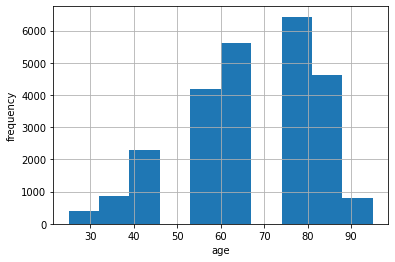

In [33]:
data_hist = _data['age'].hist()
data_hist.set_xlabel('age')
data_hist.set_ylabel('frequency')

In [34]:
df_age = pd.DataFrame(_data, columns=['age', 'count']).groupby(by='age').size()

In [35]:
df = pd.DataFrame(_data, columns=['age', 'readmitted']).groupby(by='age').sum('readmitted')
df

,readmitted
age,
25.0,142
35.0,283
45.0,856
55.0,1621
65.0,2370
75.0,2787
85.0,2129
95.0,332


Text(0, 0.5, 'readmitted')

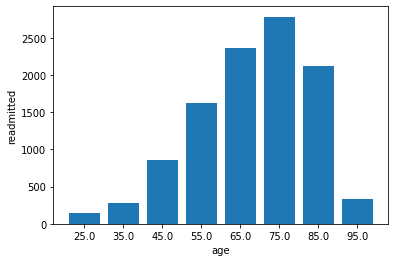

In [36]:
plt.bar([str(x) for x in df.index.tolist()], df['readmitted'], align="center")
plt.xlabel('age')
plt.ylabel('readmitted')

In [37]:
df['count'] = pd.DataFrame(df_age)[0]
df

,readmitted,count
age,,
25.0,142,388
35.0,283,859
45.0,856,2279
55.0,1621,4171
65.0,2370,5614
75.0,2787,6429
85.0,2129,4604
95.0,332,815


,0
age,
25.0,0.365979
35.0,0.329453
45.0,0.375603
55.0,0.388636
65.0,0.422159
75.0,0.433504
85.0,0.462424
95.0,0.407362


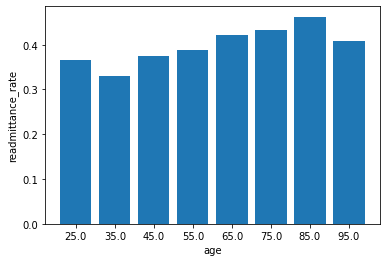

In [38]:
df_age_percentage = df['readmitted']/df['count']
df3 = pd.DataFrame(df_age_percentage)
plt.bar([str(x) for x in df.index.tolist()], df3[0])
plt.xlabel('age')
plt.ylabel('readmittance_rate')
df3

Conclusion: Yes age has a higher impact on readmission because the percentage varies between 15%.

In [39]:
# plt.scatter(df.index, df['readmitted'])

In [40]:
# corr = _data.corr()
# corr.style.background_gradient(cmap='coolwarm')

#EDA2 African american readmittance hypothesis
2.1 distribution of readmitted by race


In [41]:
df1 = pd.DataFrame(_data, columns=['race', 'readmitted']).groupby(by='race').sum('readmitted') #positive
df1

,readmitted
race,
AfricanAmerican,1913
Asian,92
Caucasian,8162
Hispanic,169
Other,184


Text(0, 0.5, 'readmitted')

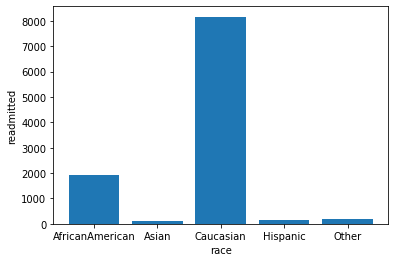

In [42]:
plt.bar([str(x) for x in df1.index.tolist()], df1['readmitted'])
plt.xlabel('race')
plt.ylabel('readmitted')

2.2 Total occurence of race(s)

Text(0, 0.5, 'frequency')

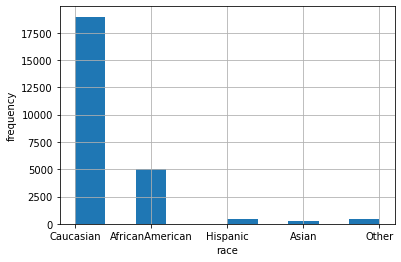

In [43]:
race_hist = _data['race'].hist()
race_hist.set_xlabel('race')
race_hist.set_ylabel('frequency')

In [44]:
df2 = pd.DataFrame(_data, columns=['race', 'count']).groupby(by='race').size() #total
df2

race
AfricanAmerican     5037
Asian                237
Caucasian          18973
Hispanic             463
Other                449
dtype: int64

2.3 Checking disparity between races for readmitted counts.

In [45]:
df1['count'] = pd.DataFrame(df2)[0]
df1

,readmitted,count
race,,
AfricanAmerican,1913,5037
Asian,92,237
Caucasian,8162,18973
Hispanic,169,463
Other,184,449


Text(0, 0.5, 'readmitted_percentage')

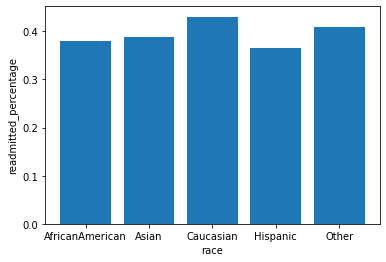

In [46]:
df3 = df1['readmitted']/df1['count']
df3 = pd.DataFrame(df3)
plt.bar(df1.index, df3[0])
plt.xlabel('race')
plt.ylabel('readmitted_percentage')

2.4 Conclusion: African Americans are not more likely to be re-admitted than other ethnic groups.

#EDA3 Women readmittance hypothesis

Text(0, 0.5, 'frequency')

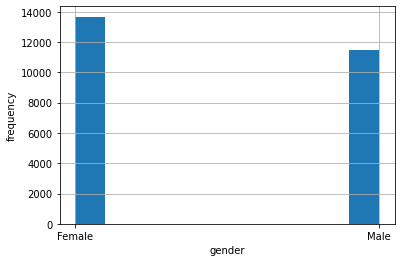

In [47]:
gender_hist = _data['gender'].hist()
gender_hist.set_xlabel('gender')
gender_hist.set_ylabel('frequency')

In [48]:
df_gen = pd.DataFrame(_data, columns=['gender', 'count']).groupby(by='gender').size()

In [49]:
df = pd.DataFrame(_data, columns=['gender', 'readmitted']).groupby(by='gender').sum('readmitted')
df

,readmitted
gender,
Female,5785
Male,4735


Text(0, 0.5, 'readmitted')

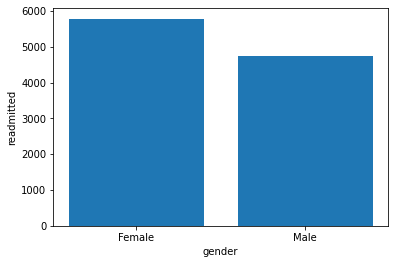

In [50]:
plt.bar([str(x) for x in df.index.tolist()], df['readmitted'], align="center")
plt.xlabel('gender')
plt.ylabel('readmitted')

In [51]:
df['count'] = pd.DataFrame(df_gen)[0]
df

,readmitted,count
gender,,
Female,5785,13672
Male,4735,11487


,0
gender,
Female,0.423128
Male,0.412205


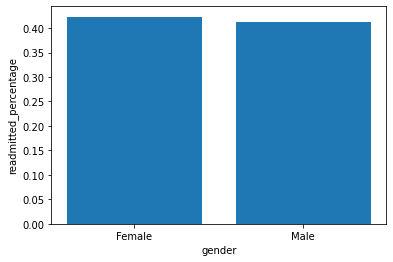

In [52]:
df_gen_percentage = df['readmitted']/df['count']
df3 = pd.DataFrame(df_gen_percentage)
plt.bar([str(x) for x in df.index.tolist()], df3[0])
plt.xlabel('gender')
plt.ylabel('readmitted_percentage')
df3

Conclusion: Yes women patients are not more likely to be re-admitted than men

In [53]:
# plt.scatter(df.index, df['readmitted'])

In [54]:
# corr = _data.corr()
# corr.style.background_gradient(cmap='coolwarm')

#EDA4 Diagnose types have a higher impact on re-admission rates

In [55]:
# _data['diag_1'].hist()

In [56]:
df_diag = pd.DataFrame(_data, columns=['diag_1', 'count']).groupby(by='diag_1').size()
df_diag

diag_1
0        5
10       1
11       3
112     13
115      1
      ... 
V55     18
V56      6
V57    103
V58     50
V71      4
Length: 565, dtype: int64

In [57]:
df = pd.DataFrame(_data, columns=['diag_1', 'readmitted']).groupby(by='diag_1').sum('readmitted')
df

,readmitted
diag_1,
0,1
10,0
11,0
112,5
115,0
...,...
V55,5
V56,1
V57,37


Text(0, 0.5, 'readmitted')

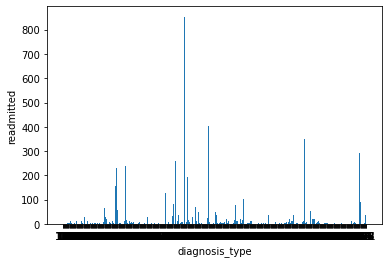

In [58]:
plt.bar([str(x) for x in df.index.tolist()], df['readmitted'], align="center")
plt.xlabel('diagnosis_type')
plt.ylabel('readmitted')

In [59]:
df['count'] = pd.DataFrame(df_diag)[0]
df

,readmitted,count
diag_1,,
0,1,5
10,0,1
11,0,3
112,5,13
115,0,1
...,...,...
V55,5,18
V56,1,6
V57,37,103


In [60]:
df_diag_percentage = df['readmitted']/df['count']
df3 = pd.DataFrame(df_diag_percentage)

In [61]:
df3[0].sort_values(ascending=False).head()

diag_1
39     1.0
971    1.0
838    1.0
341    1.0
34     1.0
Name: 0, dtype: float64

In [62]:
df3[0].sort_values(ascending=False).tail()

diag_1
448    0.0
454    0.0
793    0.0
462    0.0
501    0.0
Name: 0, dtype: float64

Text(0, 0.5, 'readmitted_percentage')

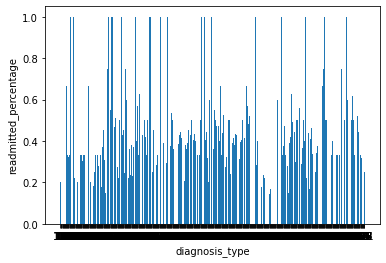

In [63]:
plt.bar([str(x) for x in df.index.tolist()], df3[0])
plt.xlabel('diagnosis_type')
plt.ylabel('readmitted_percentage')

Conclusion: Yes Diagnose types have a higher impact on re-admission rates.

#PART3 Model Building

In [64]:
df_model = pd.DataFrame(_data, columns=['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'readmitted'])
df_model.head()

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
20446,15,0,0,7,0,72091308,75.0,58,9,2,0
20737,11,0,0,3,0,72848634,65.0,59,6,3,0
20824,9,0,0,4,0,73062156,95.0,56,6,1,0
21083,18,0,0,10,0,73731852,75.0,68,6,1,0
23879,19,0,0,12,0,81355914,75.0,77,5,5,0


In [65]:
df_model.shape

(25159, 11)

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_cols = df_model.select_dtypes(include=[np.number]).copy()
scaler = MinMaxScaler().fit(num_cols.values)
scaled_df = pd.DataFrame(scaler.transform(num_cols.values), columns = df_model.columns)
scaled_df

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
0,0.350,0.000000,0.00,0.500000,0.00,0.000000,0.714286,0.575758,0.636364,0.333333,0.0
1,0.250,0.000000,0.00,0.166667,0.00,0.002037,0.571429,0.585859,0.363636,0.500000,0.0
2,0.200,0.000000,0.00,0.250000,0.00,0.002611,1.000000,0.555556,0.363636,0.166667,0.0
3,0.425,0.000000,0.00,0.750000,0.00,0.004413,0.714286,0.676768,0.363636,0.166667,0.0
4,0.450,0.000000,0.00,0.916667,0.00,0.024921,0.714286,0.767677,0.272727,0.833333,0.0
...,...,...,...,...,...,...,...,...,...,...,...
25154,0.325,0.000000,0.00,0.416667,0.25,0.999682,0.714286,0.454545,0.636364,0.833333,0.0
25155,0.625,0.333333,0.00,0.166667,0.25,0.999829,0.857143,0.444444,0.636364,0.000000,0.0
25156,0.450,0.000000,0.00,0.583333,0.00,0.999859,0.714286,0.505051,0.636364,1.000000,1.0
25157,0.700,0.000000,0.25,0.166667,0.00,0.999889,0.714286,0.262626,0.636364,0.166667,0.0


In [67]:
X = df_model.drop(columns=['readmitted'])
Y = df_model['readmitted']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((20127, 10), (5032, 10), (20127,), (5032,))

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

In [128]:
from sklearn.tree import DecisionTreeClassifier
decclassifier=DecisionTreeClassifier(max_depth=5)
decclassifier.fit(X_train, Y_train)
y_pred = decclassifier.predict(X_test)

print('DecisionTree accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))
# print("r2 score: ", r2_score(Y_test, y_pred))

DecisionTree accuracy score with all the features: 0.6363
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      2949
           1       0.59      0.39      0.47      2083

    accuracy                           0.64      5032
   macro avg       0.62      0.60      0.60      5032
weighted avg       0.63      0.64      0.62      5032

roc_auc_score:  0.6008381890441229
f1 score:  0.47322970639032813
r2 score:  -0.49908990524953967


In [144]:
from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier(n_jobs=2, n_estimators=10, random_state=0)
crf.fit(X_train, Y_train)
preds = crf.predict(X_test)

print('Random Forest accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, preds)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))
print("roc_auc_score: ", roc_auc_score(Y_test, preds))
print("f1 score: ", f1_score(Y_test, preds))
# print("r2 score: ", r2_score(Y_test, preds))

Random Forest accuracy score with all the features: 0.6145
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      2949
           1       0.55      0.39      0.46      2083

    accuracy                           0.61      5032
   macro avg       0.60      0.58      0.58      5032
weighted avg       0.60      0.61      0.60      5032

roc_auc_score:  0.5820468202684556
f1 score:  0.45810055865921784


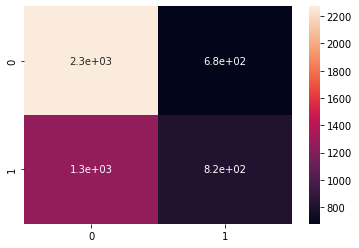

In [143]:
#plotting the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, preds)
sns.heatmap(cm, annot=True)

In [93]:
#Cross validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

In [133]:
crossvalidation = KFold(10, shuffle=True, random_state=0)
sr1 = cross_val_score(crf, X_train, Y_train, scoring='roc_auc', cv=crossvalidation, n_jobs=-1)
# # sr2 = cross_val_score(crf, X_test, Y_test, scoring='r2', cv=crossvalidation, n_jobs=-1)
print("X validation roc_auc score for random forest is", np.mean(sr1))

X validation roc_auc score for random forest is 0.611218804731972


#Part 2 KMeans

In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [74]:
model = KMeans(n_clusters=4)
model.fit(scaled_df)
## J score
print('J-score = ', model.inertia_)
#print(' score = ', model.score(scaled))
## include the labels into the data
print(model.labels_)

J-score =  9332.228459338421
[0 0 3 ... 1 3 0]


In [76]:
labels = model.labels_
md = pd.Series(labels)
scaled_df['clust'] = md
scaled_df.head(5)

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted,clust
0,0.350,0.0,0.0,0.500000,0.0,0.000000,0.714286,0.575758,0.636364,0.333333,0.0,0
1,0.250,0.0,0.0,0.166667,0.0,0.002037,0.571429,0.585859,0.363636,0.500000,0.0,0
2,0.200,0.0,0.0,0.250000,0.0,0.002611,1.000000,0.555556,0.363636,0.166667,0.0,3
3,0.425,0.0,0.0,0.750000,0.0,0.004413,0.714286,0.676768,0.363636,0.166667,0.0,3
4,0.450,0.0,0.0,0.916667,0.0,0.024921,0.714286,0.767677,0.272727,0.833333,0.0,0


In [77]:
centroids = model.cluster_centers_
print ('centroids', centroids)

centroids [[ 4.61223392e-01  5.24595392e-02  2.52929921e-02  3.30861835e-01
   8.46089452e-02  3.55819845e-01  5.88820173e-01  4.16274682e-01
   4.92944272e-01  6.07709479e-01  7.21644966e-16]
 [ 4.85387674e-01  8.17318312e-02  6.08018555e-02  3.80632869e-01
   1.62607687e-01  3.34511754e-01  6.07923885e-01  4.31947038e-01
   5.44852100e-01  6.00121493e-01  1.00000000e+00]
 [ 3.35410557e-01  7.27805918e-02  6.84817382e-02  2.40224829e-01
   1.80818448e-01  2.86328823e-01  6.19415775e-01  3.82763923e-01
   4.97600640e-01  8.93539501e-02  1.00000000e+00]
 [ 3.09662459e-01  4.65672213e-02  3.56664754e-02  2.21114617e-01
   9.00745841e-02  2.88711040e-01  5.90880529e-01  3.88587539e-01
   4.39280933e-01  9.19710588e-02 -5.96744876e-14]]


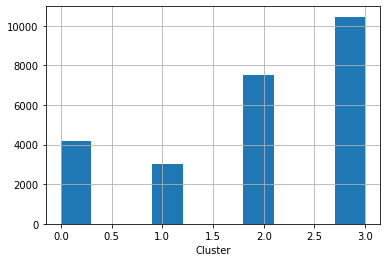

In [79]:
plt.hist(scaled_df['clust'])
#plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
#plt.ylabel('Frequency')
plt.grid()
plt.show()

In [81]:
scaled_df.groupby('clust').mean()

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
clust,,,,,,,,,,,
0,0.461223,0.052460,0.025293,0.330862,0.084609,0.355820,0.588820,0.416275,0.492944,0.607709,0.0
1,0.485171,0.081786,0.060676,0.380498,0.162550,0.334375,0.607948,0.431858,0.544611,0.600464,1.0
2,0.335538,0.072761,0.068530,0.240316,0.180837,0.286397,0.619403,0.382813,0.497710,0.089352,1.0
3,0.309662,0.046567,0.035666,0.221115,0.090075,0.288711,0.590881,0.388588,0.439281,0.091971,0.0


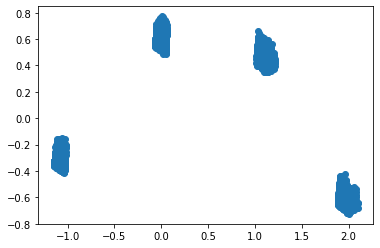

In [84]:
pca_data = PCA(n_components=2).fit(scaled_df)
pca_2d = pca_data.transform(scaled_df)
plt.scatter(pca_2d[:,0], pca_2d[:,1])
#plt.title('unclustered data')
plt.show()

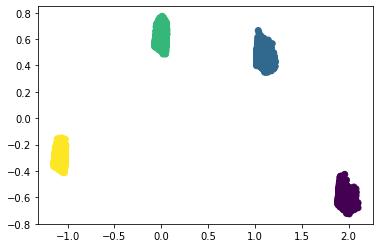

In [85]:
#2D plot of the clusters
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels)
#plt.title('clusters')
plt.show()